In [1]:
import warnings
warnings.filterwarnings("ignore")
from anndata import AnnData
import scanpy as sc
import pandas as pd
import numpy as np
import copy

import os
import cv2
import skimage as ski
import matplotlib.pyplot as plt
import seaborn as sns

from st_processing_V2 import get_adata_STARsolo

color_list=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf',
           '#a6cee3','#fdbf6f','#b2df8a','#fb9a99','#cab2d6']

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'

geneinfo_path='/histor/zhao/pangkun/JupyterLab/Task/Public_data/reference/mm10/nofiltered/'

sample: sample2-1
No Velocyto
Image loading from /histor/zhao/pangkun/Zhaolab/Hubeiyu/20230712-T3-70-32um-ele/data/Image/T3-sample2-1-HE.png
Image loading from /histor/zhao/pangkun/Zhaolab/Hubeiyu/20230712-T3-70-32um-ele/data/Image/T3-sample2-1-mask.png
Image loading from /histor/zhao/pangkun/Zhaolab/Hubeiyu/20230712-T3-70-32um-ele/data/Image/T3-sample2-1-marker.png
Image loading from /histor/zhao/pangkun/Zhaolab/Hubeiyu/20230712-T3-70-32um-ele/data/Image/T3-sample2-1-spot.png
#Spot in tissue: 1677
#Spot in tissue ratio: 34%
Median UMIs: 9033.0
Median Genes: 3862.0
In tissue(%): 91.0
Reading runtime： 14.0 s
-


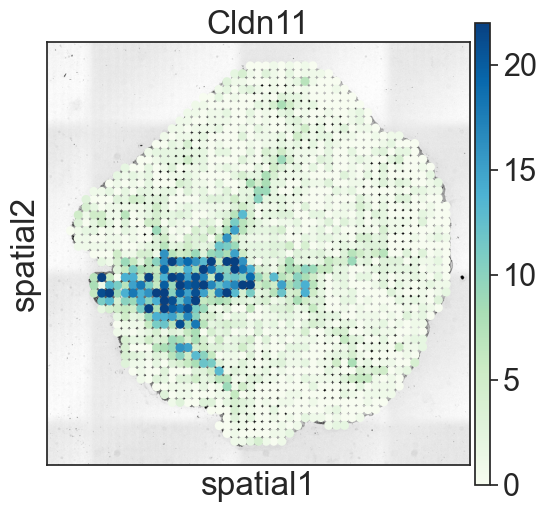

In [9]:
res_um=32 #点直径（μm）
channels_num=70 #通道数
barcode_num=70 #barcode数
reg='reg1' #区域
sample='sample2-1'
chip_type='T3'
barcode_numA=70
barcode_numB=70
file_path='/histor/zhao/pangkun/Zhaolab/Hubeiyu/20230712-T3-70-32um-ele/data/result_STARsolo/'+sample+'/STARsolo_se/'
image_file_path='/histor/zhao/pangkun/Zhaolab/Hubeiyu/20230712-T3-70-32um-ele/data/Image/'
Barcode_file_path='/histor/zhao/pangkun/Zhaolab/Hubeiyu/20230712-T3-70-32um-ele/data/Barcode-T3-70/'
sam_checkpoint_path = '/histor/zhao/pangkun/JupyterLab/Task/software/segment-anything/checkpoint/sam_vit_h_4b8939.pth'

s=None
if s is not None:
    sample_name=sample[:sample.rfind(s)]
    s_id=True
else:
    sample_name=sample
    s_id=False

HE_point1=(680,975)#HE图像的坐标  
Spot_point1=(870,760)#激光点图像的坐标  
HE_point2=(4485,4517)#HE图像的坐标
Spot_point2=(4674, 4297)#激光点图像的坐标 

line_point_r1c1=(1166,1007)  #Spot 左上角
line_point_r1c70=(1157,3990) #Spot 右上角
line_point_r70c1=(4147,1009) #Spot左下角

adata=get_adata_STARsolo(sample,chip_type,reg,channels_num,barcode_numA,barcode_numB,res_um=res_um,only_HE=False,s_id=s_id,s=s,mask_sam=False,
                        img_file=True,EM=True,Velocyto=False,soloFeatures='GeneFull',raw=True,species='mouse',sam_checkpoint=sam_checkpoint_path,
                        file_path=file_path,image_file_path=image_file_path,Barcode_file_path=Barcode_file_path,geneinfo_path=geneinfo_path,
                        HE_point1=HE_point1,Spot_point1=Spot_point1,HE_point2=HE_point2,Spot_point2=Spot_point2,
                        line_point_r1c1=line_point_r1c1,line_point_r1c70=line_point_r1c70,line_point_r70c1=line_point_r70c1)
adata.write('./st_data/'+sample+'.h5ad')

adata = adata[adata.obs["in_tissue"] == '1' ]

sns.set(style="ticks", font_scale=2)

sc.pl.spatial(adata, img_key='hires',
              gene_symbols='Symbol',
              spot_size=50,ncols=5, 
              color=['Cldn11'],
              vmin='p0',vmax='p99',cmap='GnBu',
              show=True)